In [293]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential 
from keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Reshape
import matplotlib.pyplot as plt
import pandas as pd

In [318]:
def sepnum(number):
    number = [int(i) for i in str(number)]
    number = np.asarray(number)
    number = number.reshape(9,9)
    return number
def probsort(num):
    for i in range(9):
        for j in range(9):
            a=int(num[0,i,j])
            num[a,i,j]=1 

    return num

x_train=np.zeros(shape=(10000,1,9,9))
x_test=np.zeros(shape=(10000,1,9,9))
y_train=np.zeros(shape=(10000,10,9,9))
y_test=np.zeros(shape=(10000,10,9,9))

data= pd.read_csv("D:\python\sudoku solver\sudoku.csv",nrows=20000)

In [319]:
for i in range(10000):
    x_train[i,0,:,:]= sepnum(data.iloc[i,0])
    x_test[i,0,:,:]= sepnum(data.iloc[(i+10000),0])
    y_train[i,0,:,:]= sepnum(data.iloc[i,1])
    y_test[i,0,:,:]= sepnum(data.iloc[(i+10000),1])
    i=i+1

print(y_train[0,0,:,:])

for i in range(10000):
    y_train[i]=probsort(y_train[i])
    y_test[i]=probsort(y_train[i])
y_train=np.delete(y_train,0,1)
y_test=np.delete(y_test,0,1)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

[[6. 7. 9. 5. 1. 8. 2. 4. 3.]
 [5. 4. 3. 7. 2. 9. 6. 1. 8.]
 [8. 2. 1. 6. 3. 4. 9. 5. 7.]
 [7. 9. 4. 3. 5. 2. 1. 8. 6.]
 [3. 5. 8. 4. 6. 1. 7. 2. 9.]
 [2. 1. 6. 8. 9. 7. 5. 3. 4.]
 [4. 8. 5. 2. 7. 6. 3. 9. 1.]
 [9. 6. 2. 1. 8. 3. 4. 7. 5.]
 [1. 3. 7. 9. 4. 5. 8. 6. 2.]]
(10000, 1, 9, 9) (10000, 1, 9, 9) (10000, 9, 9, 9) (10000, 9, 9, 9)


In [320]:
print(x_train[0,0,:,:])
print(y_train[0,:,:,:])

[[0. 7. 0. 0. 0. 0. 0. 4. 3.]
 [0. 4. 0. 0. 0. 9. 6. 1. 0.]
 [8. 0. 0. 6. 3. 4. 9. 0. 0.]
 [0. 9. 4. 0. 5. 2. 0. 0. 0.]
 [3. 5. 8. 4. 6. 0. 0. 2. 0.]
 [0. 0. 0. 8. 0. 0. 5. 3. 0.]
 [0. 8. 0. 0. 7. 0. 0. 9. 1.]
 [9. 0. 2. 1. 0. 0. 0. 0. 5.]
 [0. 0. 7. 0. 4. 0. 8. 0. 2.]]
[[[0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 

In [347]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(1,9,9)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(1,1), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(81*9))
model.add(Reshape((9,9,9)))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()
#history=model.fit(x_train,y_train,epochs=50,batch_size = 100,validation_split=0.33,verbose=0)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 1, 9, 64)          5248      
                                                                 
 batch_normalization_24 (Bat  (None, 1, 9, 64)         256       
 chNormalization)                                                
                                                                 
 conv2d_37 (Conv2D)          (None, 1, 9, 64)          36928     
                                                                 
 batch_normalization_25 (Bat  (None, 1, 9, 64)         256       
 chNormalization)                                                
                                                                 
 conv2d_38 (Conv2D)          (None, 1, 9, 128)         8320      
                                                                 
 flatten_12 (Flatten)        (None, 1152)            

In [348]:
history=model.fit(x_train,y_train,epochs=100,batch_size = 1000,validation_split=0.33,verbose=0)

In [336]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


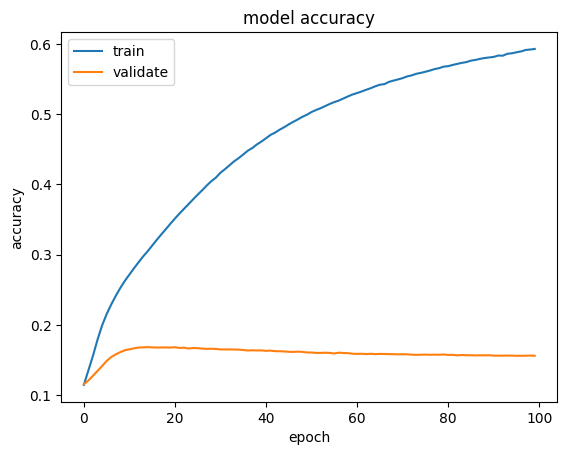

In [349]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [328]:
loss,accuracy=model.evaluate(x_test,y_test,verbose=0)
print(loss)
print(accuracy)

2.255356550216675
0.11119876801967621


In [316]:
a=np.zeros(shape=(1,1,9,9))
a[0]=x_test[0]
print(a)
sample=model.predict(a,verbose=0)
print(sample)

[[[[5. 0. 0. 0. 7. 1. 0. 0. 9.]
   [9. 8. 6. 0. 0. 3. 0. 7. 0.]
   [0. 0. 0. 6. 9. 0. 0. 2. 0.]
   [3. 0. 9. 0. 0. 0. 0. 5. 0.]
   [6. 0. 0. 7. 0. 0. 0. 4. 0.]
   [7. 5. 0. 3. 0. 9. 0. 0. 6.]
   [2. 3. 0. 9. 0. 8. 6. 1. 5.]
   [4. 6. 5. 0. 0. 2. 8. 0. 7.]
   [0. 0. 0. 5. 6. 7. 4. 3. 2.]]]]
[[[[1.46641154e-02 9.48403701e-02 7.27506950e-02 6.16131984e-02
    2.77399039e-03 2.58471578e-01 1.01491295e-01 3.89463127e-01
    3.93166579e-03]
   [3.65902641e-04 6.74001649e-02 2.90603358e-02 3.40298355e-01
    1.28214732e-01 2.29599833e-01 7.72104636e-02 1.64055545e-02
    1.11444712e-01]
   [6.21086471e-02 1.55914709e-01 1.35854155e-01 1.74683966e-02
    6.42280234e-03 2.98831940e-01 1.88792884e-01 6.81967437e-02
    6.64097816e-02]
   [1.75428182e-01 2.68054586e-02 1.67505722e-02 1.39367834e-01
    3.99851322e-01 8.03174078e-02 8.83048102e-02 4.83657606e-02
    2.48086695e-02]
   [9.89188775e-02 3.24674904e-01 7.82050267e-02 1.16876019e-02
    8.13445225e-02 3.78052704e-02 4.06248197e-02 2.47